## Partie 1 : Exploration des Données

### 1.1 Chargement et aperçu

In [52]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

housing = fetch_california_housing(as_frame=True)
df = housing.frame

print(f"Nombre d'observations : {df.shape[0]}")
print(f"Nombre de features : {df.shape[1] - 1}")
print(f"\nAperçu des données :")
df.head()

Nombre d'observations : 20640
Nombre de features : 8

Aperçu des données :


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [54]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [55]:
print(df.isnull().sum())

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


In [56]:
def detect_outliers(df, columns):
    outliers_info = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers_info[col] = len(outliers)
    return pd.Series(outliers_info)

detect_outliers(df, df.columns)

MedInc          681
HouseAge          0
AveRooms        511
AveBedrms      1424
Population     1196
AveOccup        711
Latitude          0
Longitude         0
MedHouseVal    1071
dtype: int64

### 1.2 Analyse de la variable cible

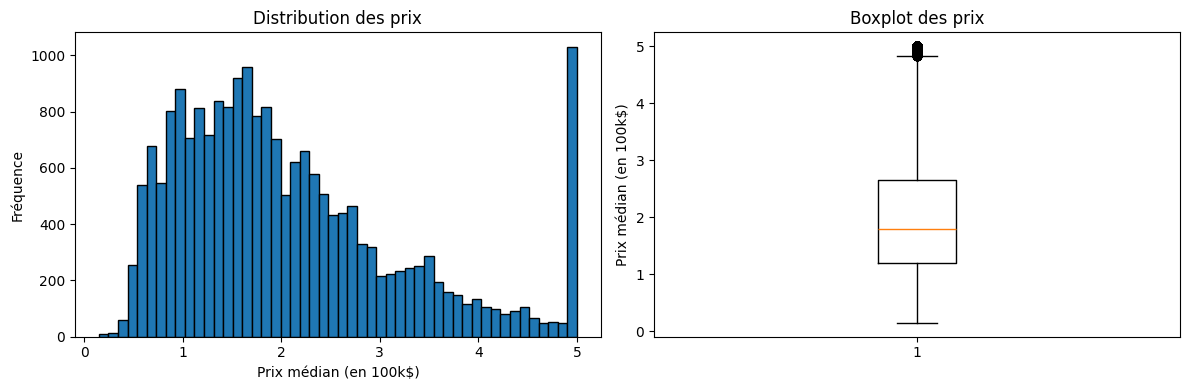

In [57]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].hist(df['MedHouseVal'], bins=50, edgecolor='black')
axes[0].set_xlabel('Prix médian (en 100k$)')
axes[0].set_ylabel('Fréquence')
axes[0].set_title('Distribution des prix')

axes[1].boxplot(df['MedHouseVal'])
axes[1].set_ylabel('Prix médian (en 100k$)')
axes[1].set_title('Boxplot des prix')

plt.tight_layout()
plt.show()


### 1.3 Analyse des corrélations

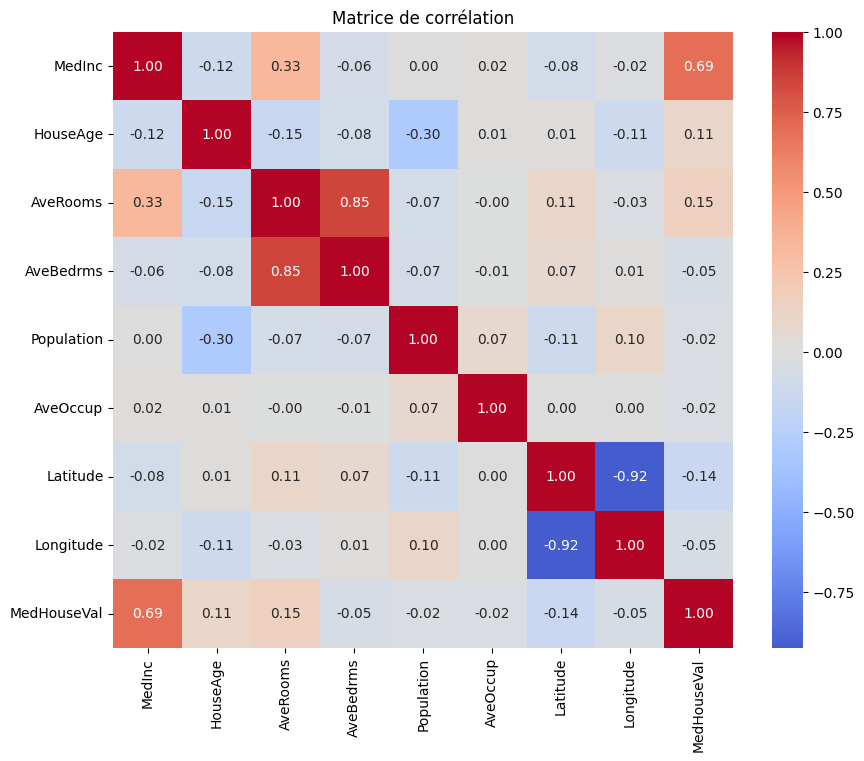

In [58]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Matrice de corrélation')
plt.show()

### 1.4 Analyse spatiale

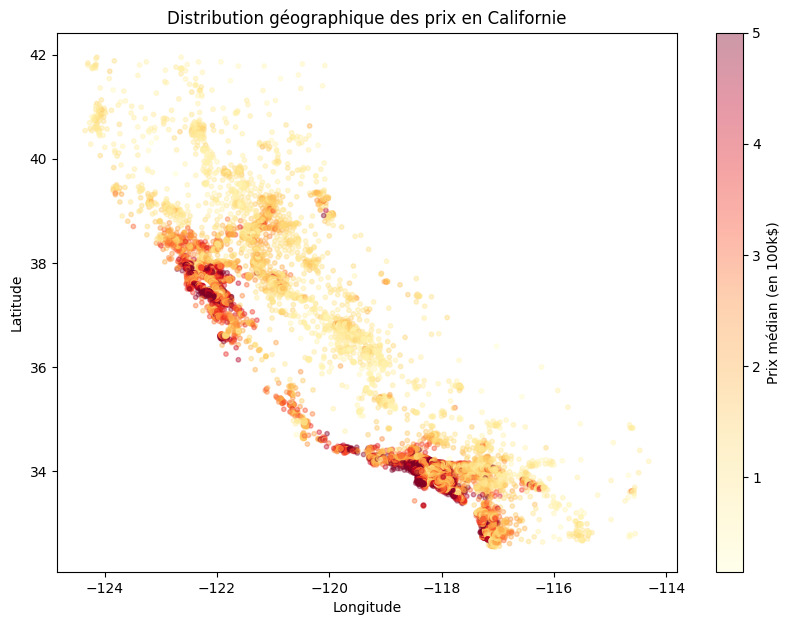

In [59]:
plt.figure(figsize=(10, 7))
plt.scatter(df['Longitude'], df['Latitude'], c=df['MedHouseVal'], 
            cmap='YlOrRd', alpha=0.4, s=10)
plt.colorbar(label='Prix médian (en 100k$)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Distribution géographique des prix en Californie')
plt.show()

## Partie 2 : Preprocessing avec Pipeline

### 2.1 Préparation des données

In [62]:
from sklearn.model_selection import train_test_split

X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Taille du jeu d'entraînement : {X_train.shape[0]}")
print(f"Taille du jeu de test : {X_test.shape[0]}")

Taille du jeu d'entraînement : 16512
Taille du jeu de test : 4128


### 2.2 Création du Pipeline avec Feature Engineering

In [63]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer

def add_features(X):
    X = X.copy()
    # 1. Ratio chambres/pièces (indicateur de taille des pièces)
    X['BedroomRatio'] = X['AveBedrms'] / X['AveRooms']
    # 2. Nombre total de pièces dans le bloc
    X['TotalRooms'] = X['AveRooms'] * X['AveOccup'] * X['Population']
    # 3. Densité de population (personnes par pièce)
    X['RoomsPerPerson'] = X['AveRooms'] / X['AveOccup']
    return X

numeric_features = X_train.columns.tolist()

pipeline = Pipeline([
    ('feature_engineering', FunctionTransformer(add_features)),
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

### 2.3 Entraînement du modèle

In [64]:
pipeline.fit(X_train, y_train)

,steps,"[('feature_engineering', ...), ('scaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,func,<function add...002F2EF7AB420>
,inverse_func,None
,validate,False
,accept_sparse,False
,check_inverse,True
,feature_names_out,None
,kw_args,None


### 2.4 Évaluation du modèle

In [65]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)


print(f"R² = train : {train_r2} test : {test_r2}")
print(f"RMSE = train : {train_rmse} test : {test_rmse}")
print(f"MAE = train : {train_mae} test : {test_mae}")

R² = train : 0.6586272485921683 test : 0.6519820501135887
RMSE = train : 0.6755291675276486 test : 0.6753116659144465
MAE = train : 0.4831594266774107 test : 0.4859648008300814


## Partie 3 : Sauvegarde et Utilisation

### 3.1 Sauvegarde du modèle

In [66]:
import joblib

joblib.dump(pipeline, 'model_california_housing.pkl')

['model_california_housing.pkl']

### 3.2 Fonction de prédiction

In [67]:
def predict_house_price(model, house_data):
    if isinstance(house_data, dict):
        house_data = pd.DataFrame([house_data])
  
    prediction = model.predict(house_data)[0]
    
    return prediction

exemple_maison = {
    'MedInc': 8.3,
    'HouseAge': 15,
    'AveRooms': 6.5,
    'AveBedrms': 1.2,
    'Population': 1200,
    'AveOccup': 3.0,
    'Latitude': 37.88,
    'Longitude': -122.23
}

prix_predit = predict_house_price(pipeline, exemple_maison)
print(f"Prix prédit pour cette maison : ${prix_predit * 100000:.0f}")

Prix prédit pour cette maison : $378580
